In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import zipfile

In [5]:
# Extract and load the dataset from archive.zip
zip_file_path = 'C:/Users/bhard/OneDrive/Desktop/My all Projects/Cleaning Data/archive.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('C:/Users/bhard/OneDrive/Desktop/My all Projects/Cleaning Data')

In [6]:
# Assuming the extracted CSV file is named 'df_final_features.csv'
file_path = 'C:/Users/bhard/OneDrive/Desktop/My all Projects/Cleaning Data/df_final_features.csv'
df = pd.read_csv(file_path)

In [7]:
# Print the number of rows and columns in the dataset
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 202616
Number of columns: 22


In [8]:
# 1. Data Integrity: Fixing Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z_]', '')

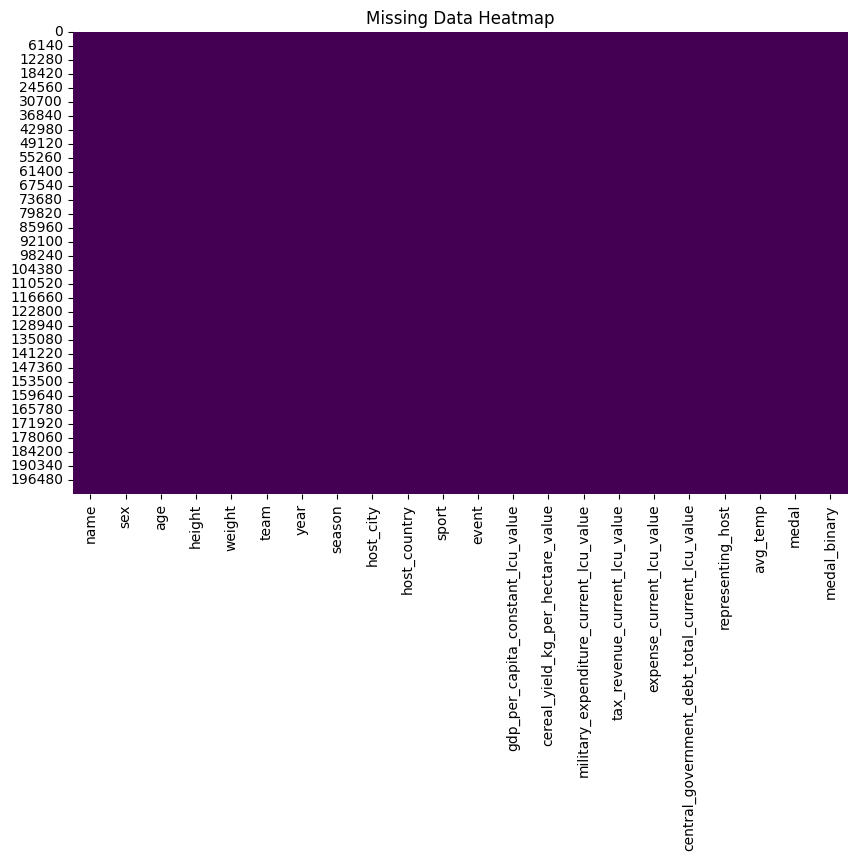

In [9]:
# 2. Missing Data Handling
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [10]:
# Handling missing data with a SimpleImputer
# Numerical columns: Impute with median
num_cols = df.select_dtypes(include=np.number).columns
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

In [11]:
# Categorical columns: Impute with most frequent value
cat_cols = df.select_dtypes(include='object').columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [12]:
# 3. Duplicate Removal
# Remove duplicate rows and display the number of removed duplicates
initial_rows = df.shape[0]
df = df.drop_duplicates()
removed_duplicates = initial_rows - df.shape[0]
print(f'Removed {removed_duplicates} duplicate rows.')

Removed 0 duplicate rows.


In [18]:
# 4. Standardization
# Standardize numerical columns for better analysis
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [14]:
# Encode categorical columns
label_encoder = LabelEncoder()
for column in cat_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [15]:
# 5. Outlier Detection
# Using Z-score method
z_scores = np.abs(stats.zscore(df[num_cols]))
outliers = (z_scores > 3).any(axis=1)
df_cleaned = df[~outliers]

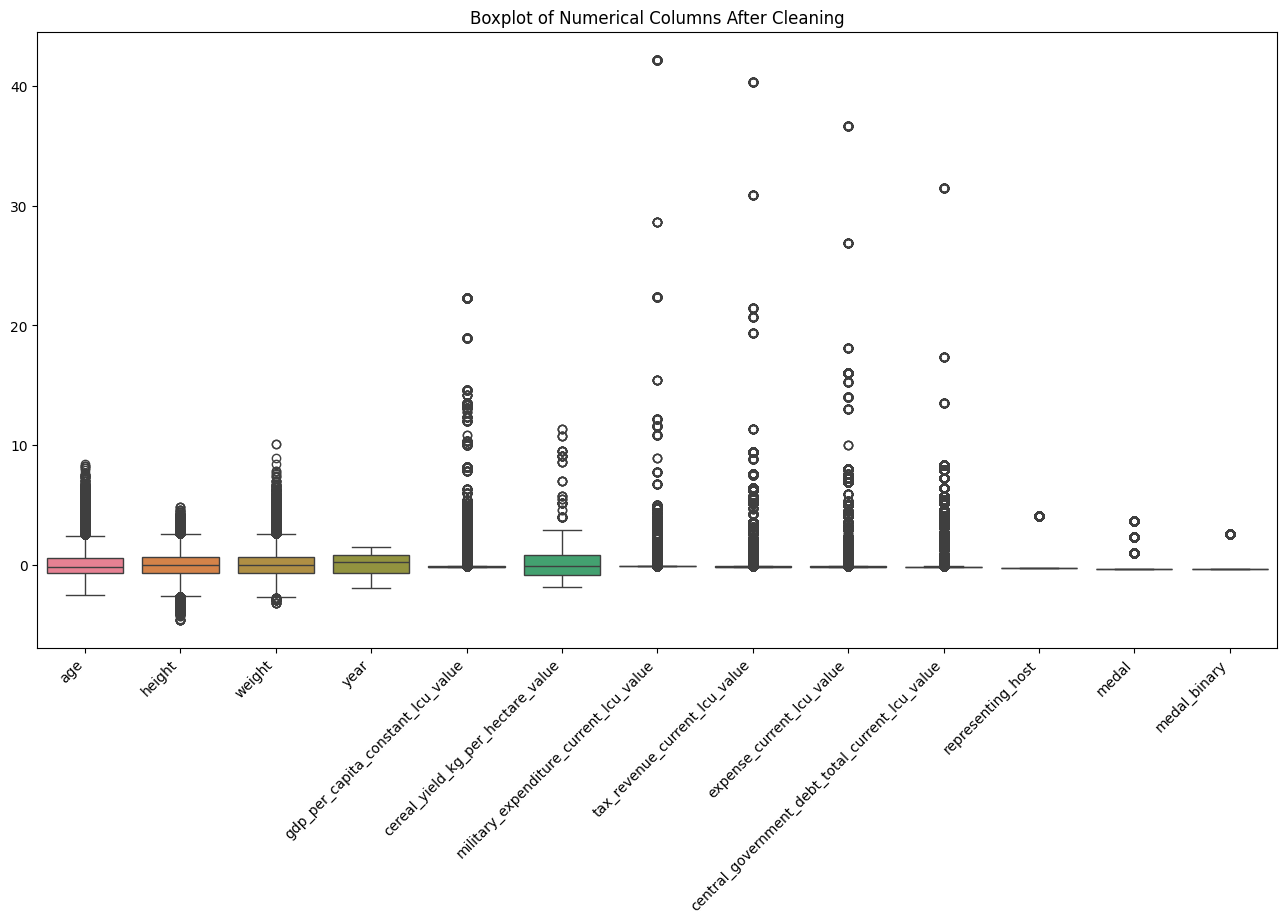

In [20]:
# Visualization of Outliers with clearer x-axis markings
plt.figure(figsize=(16, 8))  # Increase the figure size
sns.boxplot(data=df[num_cols])
plt.title('Boxplot of Numerical Columns After Cleaning')
# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')  

plt.show()

In [17]:
# Save the cleaned data to a new CSV file
output_file_path = 'C:/Users/bhard/OneDrive/Desktop/My all Projects/Cleaning Data/cleaned_data_v4.csv'
df_cleaned.to_csv(output_file_path, index=False)

print("Data cleaning completed. Cleaned data saved to cleaned_data_v4.csv.")

Data cleaning completed. Cleaned data saved to cleaned_data_v4.csv.
